In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df1 = pd.read_csv("./online_retail_II (2).csv", encoding="latin1")

In [4]:
df2 = pd.read_csv("./online_retail_II.csv" , encoding="latin1")

In [5]:
df = pd.concat([df1,df2])
df

Invoice StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

             InvoiceDate  Price  Customer ID         Country  
0       01-12-2010 08:26   2.55      17850.0  United Kingdom  
1       01-12-2010 08:26   3.39      17850.0  United Kingdom  
2       01-12-2010 08:26   2.75      17850.0  United Kingdom  
3       01-12-2010 08:26   3.39      17850.0  United Kingdom  
4       01-12-2010 08:26   3.39      17850.0  United Kingdom  
...                  ...    ...          ...             ...  
525456  09-12-2010 20:01   2.95      17530.0  United Kingdom  
525457  09-12-2010 20:01   3.75      17530.0  United Kingdom  
525458  09-12-2010 20:01   3.75      17530.0  United Kingdom  
525459  09-12-2010 20:01   3.75      17530.0  United Kingdom  
525460  09-12-2010 20:01   1.95      17530.0  United Kingdom  

[1067371 rows x 8 columns]

In [6]:
df.describe()

Quantity         Price    Customer ID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75%    1.000000e+01  4.150000e+00   16797.000000
max    8.099500e+04  3.897000e+04   18287.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 73.3+ MB


In [8]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [9]:
# 1. Drop rows with missing Customer ID
df.dropna(subset=['Customer ID'], inplace=True)
df = df[~df['Invoice'].astype(str).str.startswith('C')]
df = df[df['Quantity'] > 0]
df['Customer ID'] = df['Customer ID'].astype(int)
df['TotalPrice'] = df['Quantity'] * df['Price']
print("Data cleaned and preprocessed.")
print("New shape of the dataframe:", df.shape)

Data cleaned and preprocessed.
New shape of the dataframe: (805620, 9)


In [10]:

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%d-%m-%Y %H:%M")



In [11]:
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
print(f"Snapshot Date: {snapshot_date}")


Snapshot Date: 2011-12-10 12:50:00


In [12]:
# --- Calculate RFM Metrics ---

# Set a "snapshot" date for analysis. This should be one day after the last transaction date.
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
print(f"Snapshot Date: {snapshot_date}")

# Group by customer and calculate RFM
rfm_df = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days, # Recency
    'Invoice': 'nunique',                                         # Frequency
    'TotalPrice': 'sum'                                           # Monetary
})

# Rename the columns for clarity
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                       'Invoice': 'Frequency',
                       'TotalPrice': 'MonetaryValue'}, inplace=True)

print("\nRFM DataFrame:")
print(rfm_df.head())

Snapshot Date: 2011-12-10 12:50:00

RFM DataFrame:
             Recency  Frequency  MonetaryValue
Customer ID                                   
12346            326         12       77556.46
12347              2          8        5633.32
12348             75          5        2019.40
12349             19          4        4428.69
12350            310          1         334.40



RFM DataFrame with Scores:
             Recency  Frequency  MonetaryValue  R_Score  F_Score  M_Score  \
Customer ID                                                                 
12346            326         12       77556.46        2        4        4   
12347              2          8        5633.32        4        4        4   
12348             75          5        2019.40        3        3        3   
12349             19          4        4428.69        4        3        4   
12350            310          1         334.40        2        1        1   

             RFM_Score  
Customer ID             
12346               10  
12347               12  
12348                9  
12349               11  
12350                4  


C:\Users\Vaibhav barala\AppData\Local\Temp\ipykernel_9292\2743803252.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


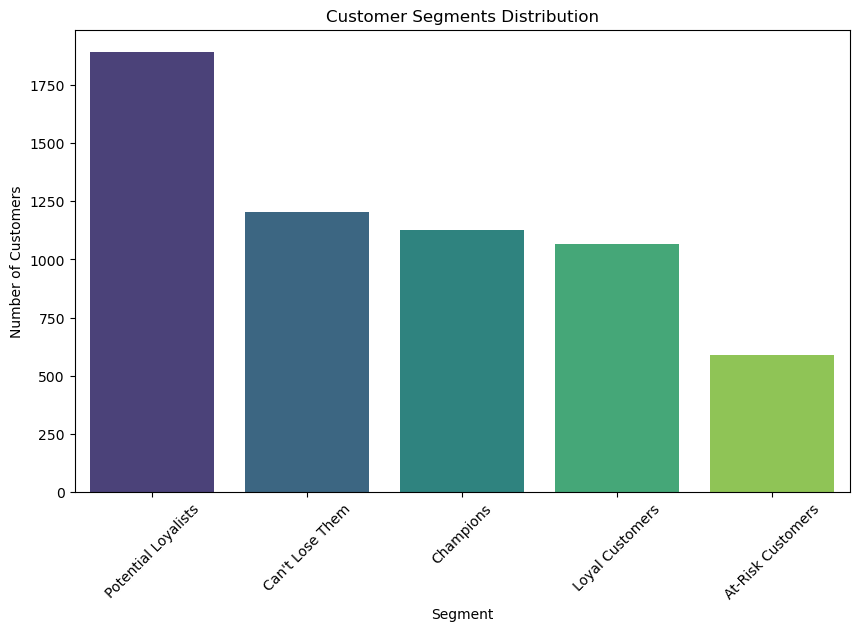


Segment Analysis:
                        Recency  Frequency  MonetaryValue
Segment                                                  
At-Risk Customers    296.231687   1.669506     448.492164
Can't Lose Them      469.139535   1.100498     229.847277
Champions             22.132092  19.272163   10758.119738
Loyal Customers       77.499064   6.760300    2898.047647
Potential Loyalists  178.620380   3.015312    1041.792083


In [13]:
# Create RFM quartile scores (1 is worst, 4 is best)
# Create RFM quartile scores (1 is worst, 4 is best)
r_labels = range(4, 0, -1) # For Recency, lower is better
f_labels = range(1, 5)     # For Frequency, higher is better
m_labels = range(1, 5)     # For Monetary, higher is better

rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=4, labels=r_labels).astype(int)
rfm_df['F_Score'] = pd.cut(
    rfm_df['Frequency'], 
    bins=[0, 1, 3, 7, rfm_df['Frequency'].max()], 
    labels=f_labels
).astype(int)
rfm_df['M_Score'] = pd.qcut(rfm_df['MonetaryValue'], q=4, labels=m_labels).astype(int)


rfm_df['RFM_Score'] = rfm_df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

print("\nRFM DataFrame with Scores:")
print(rfm_df.head())


# --- Define Segments based on RFM Score ---
def assign_segment(score):
    if score >= 11:
        return 'Champions'
    elif score >= 9:
        return 'Loyal Customers'
    elif score >= 6:
        return 'Potential Loyalists'
    elif score >= 5:
        return 'At-Risk Customers'
    else:
        return "Can't Lose Them"

rfm_df['Segment'] = rfm_df['RFM_Score'].apply(assign_segment)

# Visualize the segments
plt.figure(figsize=(10, 6))
segment_counts = rfm_df['Segment'].value_counts().sort_values(ascending=False)
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Customer Segments Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

print("\nSegment Analysis:")
print(rfm_df.groupby('Segment')[['Recency', 'Frequency', 'MonetaryValue']].mean())


In [14]:
rfm_df

Recency  Frequency  MonetaryValue  R_Score  F_Score  M_Score  \
Customer ID                                                                 
12346            326         12       77556.46        2        4        4   
12347              2          8        5633.32        4        4        4   
12348             75          5        2019.40        3        3        3   
12349             19          4        4428.69        4        3        4   
12350            310          1         334.40        2        1        1   
...              ...        ...            ...      ...      ...      ...   
18283              4         22        2736.65        4        4        4   
18284            432          1         461.68        1        1        2   
18285            661          1         427.00        1        1        2   
18286            477          2        1296.43        1        2        3   
18287             43          7        4182.99        3        3        4   

             RFM_Score              Segment  
Customer ID                                  
12346               10      Loyal Customers  
12347               12            Champions  
12348                9      Loyal Customers  
12349               11            Champions  
12350                4      Can't Lose Them  
...                ...                  ...  
18283               12            Champions  
18284                4      Can't Lose Them  
18285                4      Can't Lose Them  
18286                6  Potential Loyalists  
18287               10      Loyal Customers  

[5881 rows x 8 columns]

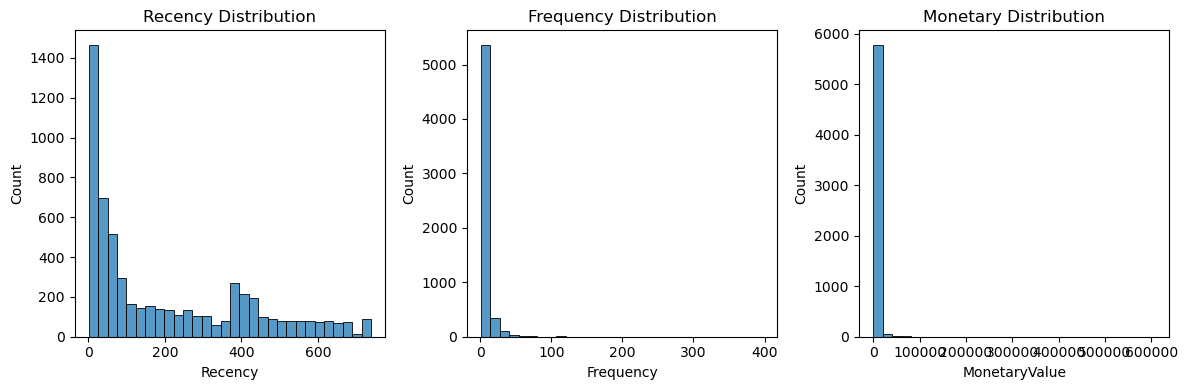


Scaled RFM data (first 5 rows):
              Recency  Frequency  MonetaryValue
Customer ID                                    
12346        0.856321   1.254938       3.170387
12347       -2.151924   0.800635       1.291999
12348       -0.079383   0.299705       0.557317
12349       -0.935429   0.074457       1.119681
12350        0.824152  -1.057568      -0.729063


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Check for skewness
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], bins=30)
plt.title('Recency Distribution')
plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], bins=30)
plt.title('Frequency Distribution')
plt.subplot(1, 3, 3)
sns.histplot(rfm_df['MonetaryValue'], bins=30)
plt.title('Monetary Distribution')
plt.tight_layout()
plt.show()

# Apply log transformation to handle skewness
rfm_log = np.log1p(rfm_df[['Recency', 'Frequency', 'MonetaryValue']]) # log1p for values that can be 0

# Scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

rfm_scaled = pd.DataFrame(rfm_scaled, index=rfm_df.index, columns=['Recency', 'Frequency', 'MonetaryValue'])
print("\nScaled RFM data (first 5 rows):")
print(rfm_scaled.head())

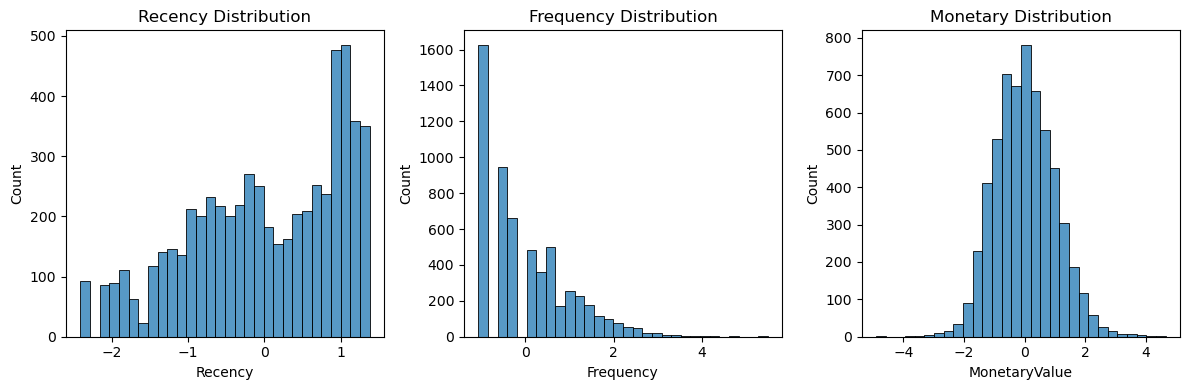

In [16]:
# Scaled-RF
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(rfm_scaled['Recency'], bins=30)
plt.title('Recency Distribution')
plt.subplot(1, 3, 2)
sns.histplot(rfm_scaled['Frequency'], bins=30)
plt.title('Frequency Distribution')
plt.subplot(1, 3, 3)
sns.histplot(rfm_scaled['MonetaryValue'], bins=30)
plt.title('Monetary Distribution')
plt.tight_layout()
plt.show()

C:\Users\Vaibhav barala\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Vaibhav barala\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Vaibhav barala\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Vaibhav barala\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Vaibhav barala\anaconda3\Lib\subprocess.py", line 1538, in _execute_c

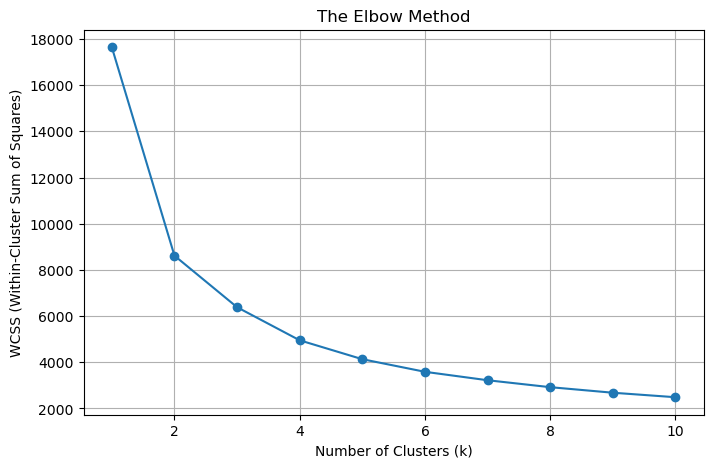

In [17]:
# Elbow Method
wcss = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss[k] = kmeans.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(list(wcss.keys()), list(wcss.values()), 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('The Elbow Method')
plt.grid(True)
plt.show()

In [18]:
# Build the model with k=4
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=900, random_state=42, n_init=10)
clusters = kmeans.fit_predict(rfm_scaled)

# Add cluster labels to the original RFM dataframe
rfm_df['Cluster'] = clusters

print("\nRFM DataFrame with K-Means Clusters:")
(rfm_df.head())


RFM DataFrame with K-Means Clusters:


Recency  Frequency  MonetaryValue  R_Score  F_Score  M_Score  \
Customer ID                                                                 
12346            326         12       77556.46        2        4        4   
12347              2          8        5633.32        4        4        4   
12348             75          5        2019.40        3        3        3   
12349             19          4        4428.69        4        3        4   
12350            310          1         334.40        2        1        1   

             RFM_Score          Segment  Cluster  
Customer ID                                       
12346               10  Loyal Customers        0  
12347               12        Champions        0  
12348                9  Loyal Customers        1  
12349               11        Champions        3  
12350                4  Can't Lose Them        2


Mean RFM values for each cluster:
            Recency  Frequency  MonetaryValue
Cluster                                      
0         27.485282  19.339781   11006.827626
1        228.376109   5.086007    1999.860081
2        395.761640   1.377024     324.967480
3         28.374900   3.043965     866.810849


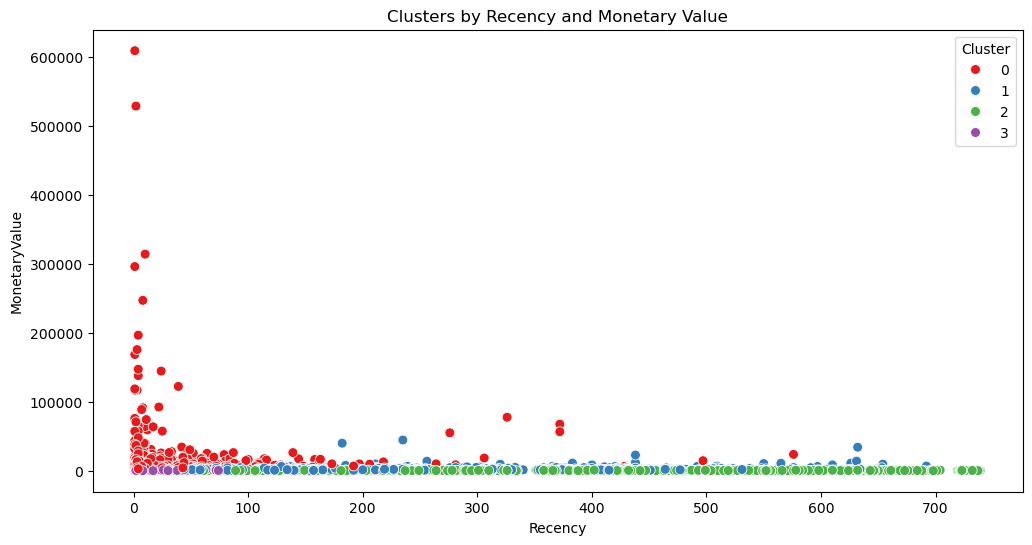

In [19]:
# Analyze the characteristics of each cluster
cluster_analysis = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'MonetaryValue']].mean()
print("\nMean RFM values for each cluster:")
print(cluster_analysis)

# Plotting the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm_df, x='Recency', y='MonetaryValue', hue='Cluster', palette='Set1', s=50)
plt.title('Clusters by Recency and Monetary Value')
plt.show()

In [20]:
rfm= rfm_df.merge(df[["Customer ID" ,"Country"]], on="Customer ID", how="left")

In [21]:
rfm = rfm.drop_duplicates()
rfm

Customer ID  Recency  Frequency  MonetaryValue  R_Score  F_Score  \
0             12346      326         12       77556.46        2        4   
34            12347        2          8        5633.32        4        4   
287           12348       75          5        2019.40        3        3   
338           12349       19          4        4428.69        4        3   
513           12350      310          1         334.40        2        1   
...             ...      ...        ...            ...      ...      ...   
804372        18283        4         22        2736.65        4        4   
805358        18284      432          1         461.68        1        1   
805386        18285      661          1         427.00        1        1   
805398        18286      477          2        1296.43        1        2   
805465        18287       43          7        4182.99        3        3   

        M_Score  RFM_Score              Segment  Cluster         Country  
0             4         10      Loyal Customers        0  United Kingdom  
34            4         12            Champions        0         Iceland  
287           3          9      Loyal Customers        1         Finland  
338           4         11            Champions        3           Italy  
513           1          4      Can't Lose Them        2          Norway  
...         ...        ...                  ...      ...             ...  
804372        4         12            Champions        0  United Kingdom  
805358        2          4      Can't Lose Them        2  United Kingdom  
805386        2          4      Can't Lose Them        2  United Kingdom  
805398        3          6  Potential Loyalists        1  United Kingdom  
805465        4         10      Loyal Customers        0  United Kingdom  

[5894 rows x 11 columns]

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
rfm_heatmap = rfm.pivot_table(index="R_Score" , columns="F_Score" , values="M_Score" , aggfunc="mean")


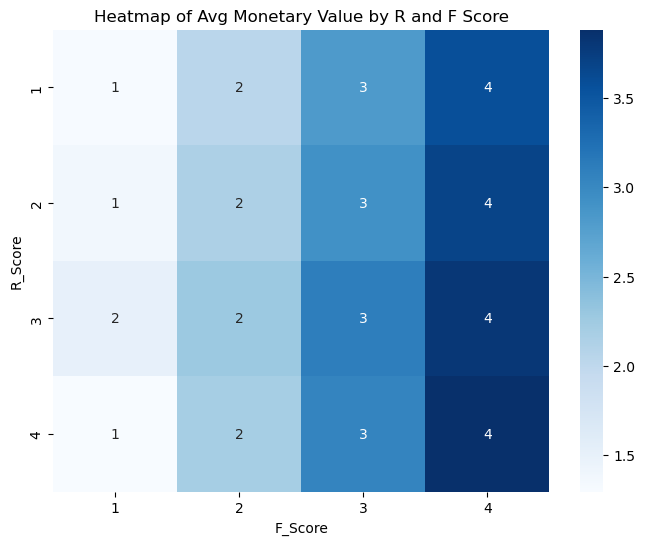

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(rfm_heatmap[:1000] , annot=True , fmt=".0f", cmap="Blues")
plt.title("Heatmap of Avg Monetary Value by R and F Score")
plt.show()

# RFM Matrix Insights

- **Top-Right (R=4, F=4): Champions**  
  Recent, frequent, and often high spenders.  

- **Top-Left (R=5, F=1): New but Rare Buyers**  
  Recently acquired customers but purchase rarely → nurture them to become loyal.  

- **Bottom-Right (R=1, F=5): At Risk of Churn**  
  Frequent buyers in the past but not recent → risk of losing them.  

- **Bottom-Left (R=1, F=1): Hibernating Customers**  
  Low engagement and low spend → inactive segment.  


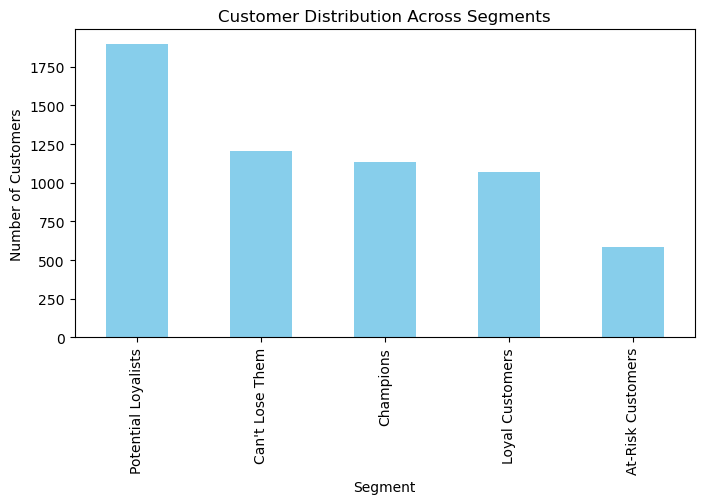

In [25]:
rfm["Segment"].value_counts().plot(kind="bar",color="skyblue" ,figsize=(8,4))
plt.title("Customer Distribution Across Segments")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()

# RFM Bar Plot Insights

- **Potential Loyalists (~1900 customers)**  
  👉 Recent buyers with growing frequency/monetary value — great opportunity to convert into **Champions**.  

- **Can’t Lose Them (~1200 customers)**  
  👉 At-risk customers who were valuable before but are not recent — need **win-back campaigns**.  

- **Champions (~1150 customers)**  
  👉 Small but **highly valuable** segment — likely contribute the most revenue.  

- **Loyal Customers (~1050 customers)**  
  👉 Frequent buyers, may not spend as much as Champions but are **stable revenue generators**.  

- **At-Risk Customers (~600 customers)**  
  👉 High churn risk and low recent activity — revenue contribution is likely **negligible now**.  


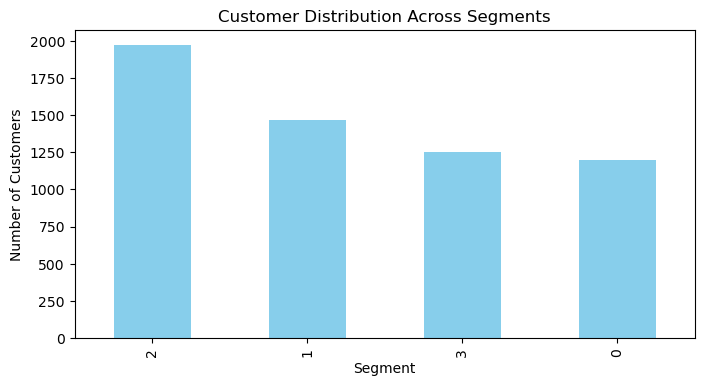

In [26]:
rfm["Cluster"].value_counts().plot(kind="bar",color="skyblue" ,figsize=(8,4))
plt.title("Customer Distribution Across Segments")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()

In [27]:
Aggreate_Segments = rfm.groupby("Segment").agg({
    "Recency": ["mean", "min", "max"],
    "Frequency": ["mean", "min", "max"],
    "MonetaryValue": ["mean", "min", "max"],
    "RFM_Score": ["mean", "min", "max"]
})

Aggreate_Segments

Recency           Frequency          MonetaryValue  \
                           mean min  max       mean min  max          mean   
Segment                                                                      
At-Risk Customers    296.231687  27  736   1.669506   1    6    448.492164   
Can't Lose Them      469.139535  97  739   1.100498   1    3    229.847277   
Champions             22.245599   1   96  19.229754   4  398  10723.491017   
Loyal Customers       77.464486   1  576   6.757944   1  155   2897.602474   
Potential Loyalists  178.802847   1  738   3.014233   1   15   1041.839286   

                                        RFM_Score          
                        min        max       mean min max  
Segment                                                    
At-Risk Customers       6.2    2300.40   5.000000   5   5  
Can't Lose Them         0.0     877.70   3.478405   3   4  
Champions            1005.8  608821.65  11.562500  11  12  
Loyal Customers       357.0  168472.50   9.499065   9  10  
Potential Loyalists     0.0   44534.30   6.988930   6   8

# RFM Segment Insights (Aggregate Statistics)

- **Champions**  
  - 🕒 Very low **Recency**: ~22 days  
  - 📦 Very high **Frequency**: ~19 orders  
  - 💰 Extremely high **Monetary**: ~10K avg  

- **Loyal Customers**  
  - 🕒 Recent **Recency**: ~77 days  
  - 📦 Moderately high **Frequency**: ~6.7 orders  
  - 💰 Good **Monetary**: ~2.9K  

- **Potential Loyalists**  
  - 🕒 Medium **Recency**: ~179 days  
  - 📦 Low **Frequency**: ~3 orders  
  - 💰 Moderate **Monetary**: ~1K  

- **Can’t Lose Them**  
  - 🕒 Very high **Recency**: ~469 days (not recent)  
  - 📦 Very low **Frequency**: ~1.1 orders  
  - 💰 Low **Monetary**: ~229  

- **At-Risk Customers**  
  - 🕒 Old purchases **Recency**: ~296 days  
  - 📦 Almost inactive **Frequency**: ~1.6 orders  
  - 💰 Low **Monetary**: ~448  


In [28]:
Aggreate_Clusters = rfm.groupby("Cluster").agg({
    "Recency": ["mean", "min", "max"],
    "Frequency": ["mean", "min", "max"],
    "MonetaryValue": ["mean", "min", "max"],
        "RFM_Score": ["mean", "min", "max"]

})
Aggreate_Clusters

Recency           Frequency          MonetaryValue          \
               mean min  max       mean min  max          mean     min   
Cluster                                                                  
0         27.525084   1  576  19.308528   2  398  10978.970625  862.42   
1        228.280952  31  738   5.085034   1   20   2000.036141  167.42   
2        395.761640  14  739   1.377024   1    8    324.967480    0.00   
3         28.403355   1   99   3.043131   1   14    867.134866   43.20   

                    RFM_Score          
               max       mean min max  
Cluster                                
0        608821.65  11.429766   9  12  
1         44534.30   7.967347   5  11  
2          1680.47   4.209008   3   7  
3          4642.45   7.972045   5  11

# Customer Clusters (RFM-based)

- **Cluster 0 → Champions**  
  - 🕒 Recency: ~27 days (recent)  
  - 📦 Frequency: ~19.3 (very high)  
  - 💰 Monetary: ~11K  

- **Cluster 1 → Potential Loyalists / Loyal Customers Mix**  
  - 🕒 Recency: ~228 days  
  - 📦 Frequency: ~5  
  - 💰 Monetary: ~2K  

- **Cluster 2 → At Risk / Can’t Lose Them**  
  - 🕒 Recency: ~395 days (old, not recent)  
  - 📦 Frequency: ~1.3 (almost no repeat)  
  - 💰 Monetary: ~325  

- **Cluster 3 → Potential Loyalists (newer, small spenders)**  
  - 🕒 Recency: ~28 days (recent)  
  - 📦 Frequency: ~3 (low)  
  - 💰 Monetary: ~867  


# Cluster-to-RFM Segment Mapping

| Cluster | Characteristics | Closest RFM Segment |
|---------|-----------------|----------------------|
| **0** | Very recent, very frequent, very high spend (Approx 11K) | Champions |
| **1** | Medium recency (228 days), medium frequency (Approx 5), moderate spend (Approx 2K) | Potential Loyalists / Loyal Customers |
| **2** | Very high recency (396 days → inactive), very low frequency (Approx 1), very low spend (Approx 325) | At Risk / Can’t Lose Them |
| **3** | Recent (28 days), low frequency (Approx 3), low spend (Approx 867) | Potential Loyalists (early stage) |


In [29]:
Segment_summary = rfm.groupby("Segment")[["Recency", "Frequency" , "MonetaryValue"]].mean()
Cluster_summary = rfm.groupby("Cluster")[["Recency", "Frequency" , "MonetaryValue"]].mean()


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cluster_scaled = pd.DataFrame(
    scaler.fit_transform(Cluster_summary),
    index=Cluster_summary.index,
    columns=Cluster_summary.columns
)

segment_scaled = pd.DataFrame(
    scaler.fit_transform(Segment_summary),
    index=Segment_summary.index,
    columns=Segment_summary.columns
)


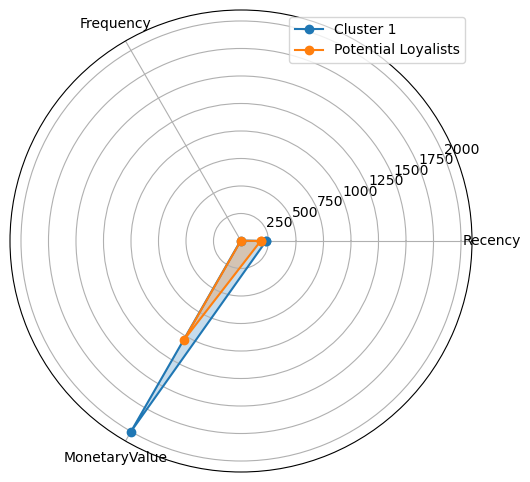

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Pick groups to compare
values1 = Cluster_summary.loc[1].values.flatten().tolist()
values2 = Segment_summary.loc["Potential Loyalists"].values.flatten().tolist()

labels = list(cluster_scaled.columns)
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values1 += values1[:1]
values2 += values2[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, values1, 'o-', label="Cluster 1")
ax.fill(angles, values1, alpha=0.25)
ax.plot(angles, values2, 'o-', label="Potential Loyalists")
ax.fill(angles, values2, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.legend()
plt.show()


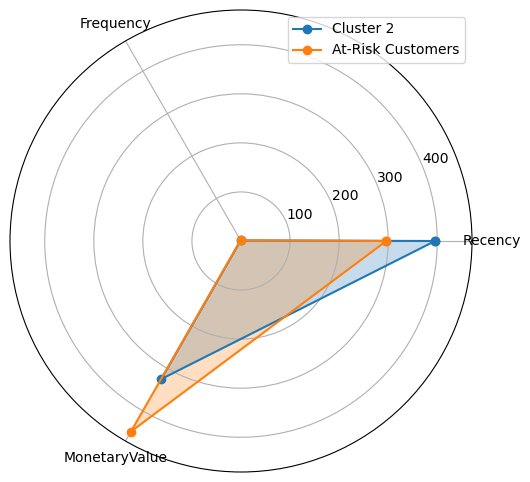

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Pick groups to compare
values1 = Cluster_summary.loc[2].values.flatten().tolist()
values2 = Segment_summary.loc["At-Risk Customers"].values.flatten().tolist()

labels = list(cluster_scaled.columns)
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values1 += values1[:1]
values2 += values2[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, values1, 'o-', label="Cluster 2")
ax.fill(angles, values1, alpha=0.25)
ax.plot(angles, values2, 'o-', label="At-Risk Customers")
ax.fill(angles, values2, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.legend()
plt.show()


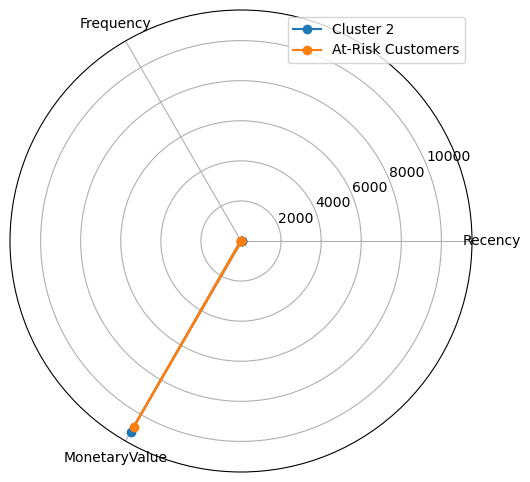

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Pick groups to compare
values1 = Cluster_summary.loc[0].values.flatten().tolist()
values2 = Segment_summary.loc["Champions"].values.flatten().tolist()

labels = list(cluster_scaled.columns)
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values1 += values1[:1]
values2 += values2[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, values1, 'o-', label="Cluster 2")
ax.fill(angles, values1, alpha=0.25)
ax.plot(angles, values2, 'o-', label="At-Risk Customers")
ax.fill(angles, values2, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.legend()
plt.show()


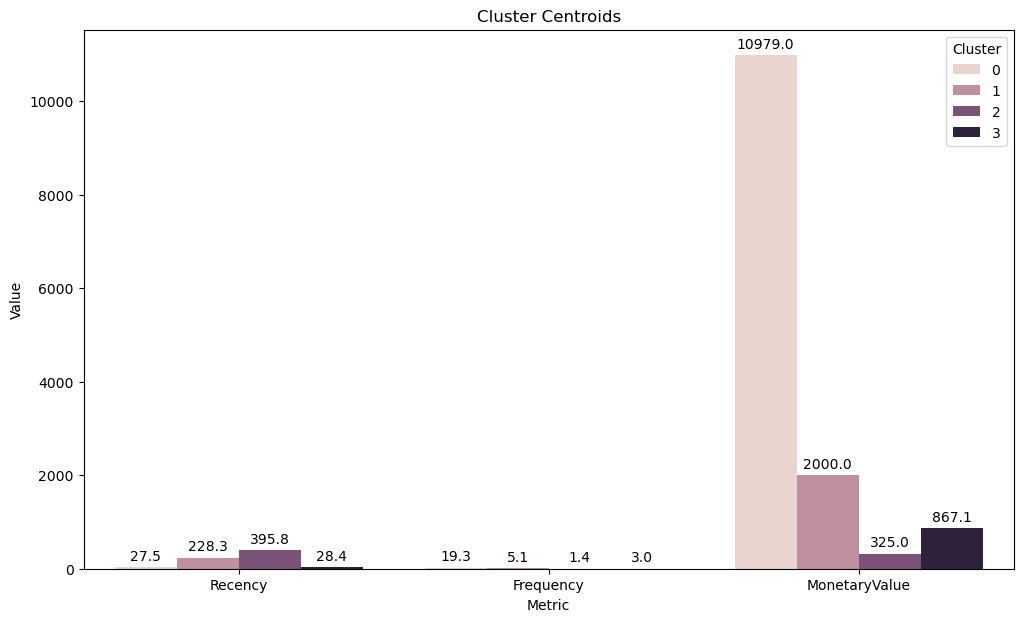

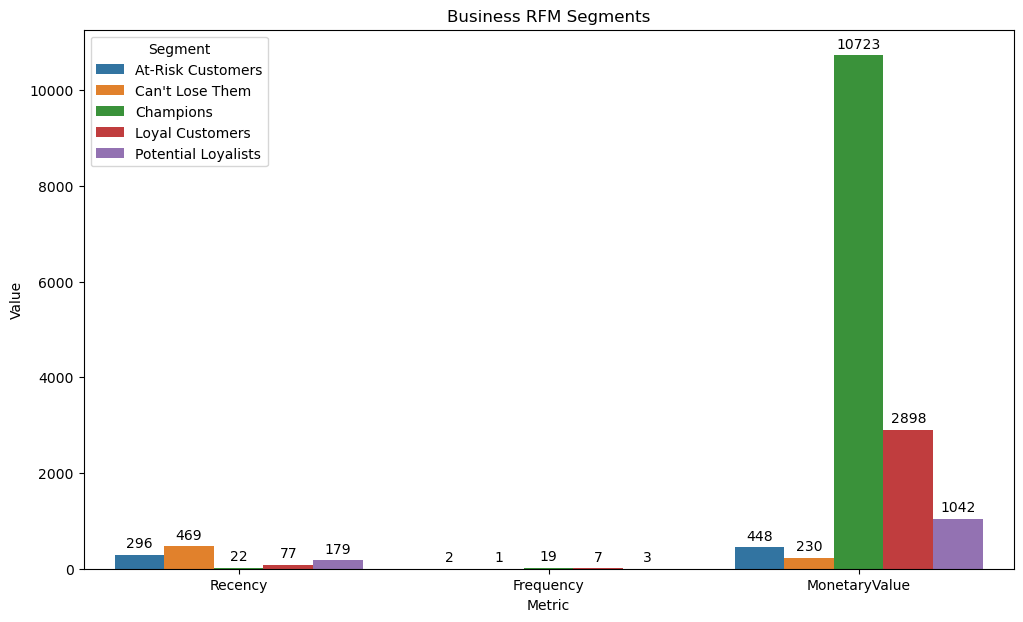

In [34]:
import seaborn as sns

# Combine summaries into long form
cluster_melt = Cluster_summary.reset_index().melt(id_vars="Cluster", var_name="Metric", value_name="Value")
cluster_melt["Type"] = "Cluster"

segment_melt = Segment_summary.reset_index().melt(id_vars="Segment", var_name="Metric", value_name="Value")
segment_melt["Type"] = "Business Segment"

# Example: compare Recency/Frequency/Monetary across groups
plt.figure(figsize=(12, 7))
# 1. Capture the plot's axes in a variable, e.g., 'ax1'
ax1 = sns.barplot(data=cluster_melt, x="Metric", y="Value", hue="Cluster")
plt.title("Cluster Centroids")

# 2. Loop through each container (each bar group) on the axes
for container in ax1.containers:
    # 3. Add labels to the container
    #    fmt='%.1f' formats the number to one decimal place
    ax1.bar_label(container, fmt='%.1f', fontsize=10, padding=3)

plt.show()


# --- Plot 2: Business RFM Segments with Value Labels ---
plt.figure(figsize=(12, 7))
# 1. Capture the plot's axes in a variable, e.g., 'ax2'
ax2 = sns.barplot(data=segment_melt, x="Metric", y="Value", hue="Segment")
plt.title("Business RFM Segments")

# 2. Loop through each container
for container in ax2.containers:
    # 3. Add labels, formatting to zero decimal places (like an integer)
    ax2.bar_label(container, fmt='%.0f', fontsize=10, padding=3)
    
plt.show()


In [35]:
Segment_country = rfm.groupby(["Segment", "Country"]).size()
Segment_country_df = rfm.groupby(["Segment", "Country"]).size().reset_index(name='count')
Segment_country_df

Segment          Country  count
0      At-Risk Customers          Austria      2
1      At-Risk Customers          Belgium      1
2      At-Risk Customers           Canada      1
3      At-Risk Customers  Channel Islands      1
4      At-Risk Customers           Cyprus      1
..                   ...              ...    ...
122  Potential Loyalists      Switzerland     10
123  Potential Loyalists         Thailand      1
124  Potential Loyalists              USA      3
125  Potential Loyalists   United Kingdom   1709
126  Potential Loyalists      Unspecified      3

[127 rows x 3 columns]

In [36]:
top_countries = Segment_country_df.groupby("Country").agg({
    "count":"sum"
})
top_countries.sort_values(by="count" , ascending=False).head(10)

count
Country              
United Kingdom   5353
Germany           107
France             95
Spain              41
Belgium            29
Portugal           24
Netherlands        22
Switzerland        22
Sweden             19
Italy              17

In [37]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [38]:
import plotly.express as px

fig = px.treemap(
    Segment_country_df,
    path=[px.Constant("All Customers"), 'Segment', 'Country'], # Defines the hierarchy
    values='count',
    color='Segment',
    title='Customer Distribution by Segment and Country',
    width=1000,   # increase width
    height=800    # increase height
)
fig.show()


In [39]:
df

Invoice StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  TotalPrice  
0      2010-12-01 08:26:00   2.55        17850  United Kingdom       15.30  
1      2010-12-01 08:26:00   3.39        17850  United Kingdom       20.34  
2      2010-12-01 08:26:00   2.75        17850  United Kingdom       22.00  
3      2010-12-01 08:26:00   3.39        17850  United Kingdom       20.34  
4      2010-12-01 08:26:00   3.39        17850  United Kingdom       20.34  
...                    ...    ...          ...             ...         ...  
525456 2010-12-09 20:01:00   2.95        17530  United Kingdom        5.90  
525457 2010-12-09 20:01:00   3.75        17530  United Kingdom        3.75  
525458 2010-12-09 20:01:00   3.75        17530  United Kingdom        3.75  
525459 2010-12-09 20:01:00   3.75        17530  United Kingdom        7.50  
525460 2010-12-09 20:01:00   1.95        17530  United Kingdom        3.90  

[805620 rows x 9 columns]

In [40]:
description_count = df.groupby(["Customer ID" , "Description"]).size()

In [41]:
description_count_df = df.groupby(["Customer ID" , "Description"]).size().reset_index(name='count')
description_count_df2 = description_count_df.merge(rfm , on="Customer ID" , how="left")

In [42]:
description_count_df2 = description_count_df2.drop_duplicates()

In [43]:
descript_sort = (
    description_count_df2
    .sort_values(by="count", ascending=False)
    .groupby("Segment")
    .head(5)
)


In [44]:
descript_sort["cost_per_item"] = descript_sort["MonetaryValue"]/descript_sort["count"]

In [45]:
descript_sort

Customer ID                          Description  count  Recency  \
216407        14911                             CARRIAGE    148        1   
464979        17850          WOODEN FRAME ANTIQUE WHITE     127      372   
464978        17850    WOOD S/3 CABINET ANT WHITE FINISH    123      372   
464980        17850    WOODEN PICTURE FRAME WHITE FINISH    122      372   
464977        17850   WOOD 2 DRAWER CABINET WHITE FINISH    121      372   
217932        14911             REGENCY CAKESTAND 3 TIER     97        1   
464974        17850   WHITE HANGING HEART T-LIGHT HOLDER     89      372   
462775        17841                        CHILLI LIGHTS     80        2   
464339        17841                   SUKI  SHOULDER BAG     76        2   
462741        17841            CHARLOTTE BAG SUKI DESIGN     64        2   
70647         13187               NAMASTE SWAGAT INCENSE      9      337   
474851        17968        HAND WARMER SCOTTY DOG DESIGN      8      374   
261744        15483   LOVEBIRD HANGING DECORATION WHITE       8      161   
372898        16795        HEART SHAPE WIRELESS DOORBELL      8      365   
226261        15013          12 PENCILS SMALL TUBE SKULL      8      488   
297116        15880      PAPER CHAIN KIT 50'S CHRISTMAS       6      369   
297118        15880               PLASTERS IN TIN SKULLS      6      369   
297143        15880                          SKULLS TAPE      6      369   
373554        16799  HANGING BAUBLE T-LIGHT HOLDER LARGE      6      432   
411839        17269      12 MESSAGE CARDS WITH ENVELOPES      6      386   
475668        17976                    CLAM SHELL SMALL       6      372   
391085        17012           FELTCRAFT BUTTERFLY HEARTS      5      725   
299681        15915            PACK OF 6 BIRDY GIFT TAGS      5      402   
302065        15962     HANGING HEART MIRROR DECORATION       5      449   
411866        17269        CUSHION COVER PINK UNION JACK      4      386   

        Frequency  MonetaryValue  R_Score  F_Score  M_Score  RFM_Score  \
216407        398      295972.63        4        4        4         12   
464979        155       56600.08        2        4        4         10   
464978        155       56600.08        2        4        4         10   
464980        155       56600.08        2        4        4         10   
464977        155       56600.08        2        4        4         10   
217932        398      295972.63        4        4        4         12   
464974        155       56600.08        2        4        4         10   
462775        211       70884.07        4        4        4         12   
464339        211       70884.07        4        4        4         12   
462741        211       70884.07        4        4        4         12   
70647           4         367.01        2        3        2          7   
474851          4         888.04        2        3        2          7   
261744         10         862.20        2        4        2          8   
372898          3        2492.39        2        2        4          8   
226261         10        1641.30        1        4        3          8   
297116          1         686.56        2        1        2          5   
297118          1         686.56        2        1        2          5   
297143          1         686.56        2        1        2          5   
373554          2         495.98        1        2        2          5   
411839          1         537.46        1        1        2          4   
475668          1         706.38        2        1        2          5   
391085          1         384.16        1        1        2          4   
299681          1         429.21        1        1        2          4   
302065          1         295.83        1        1        1          3   
411866          1         537.46        1        1        2          4   

                    Segment  Cluster         Country  cost_per_item  
216407            Champions        0

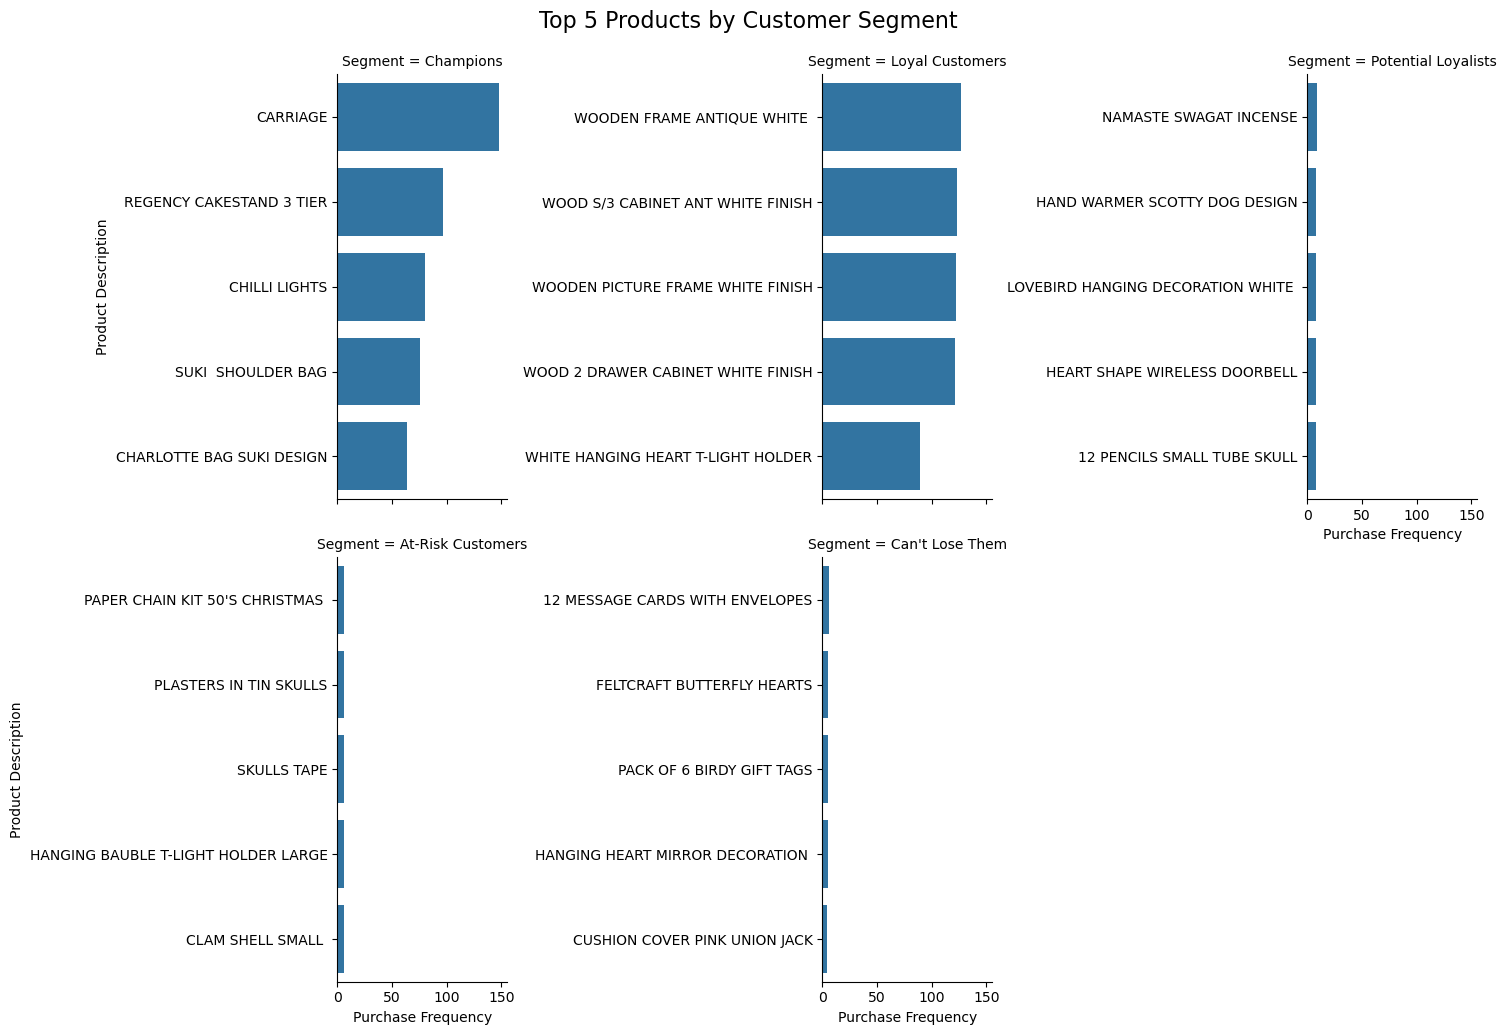

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt



# 1. Create the faceted plot object
g = sns.catplot(
    data=descript_sort,
    y='Description',   # Product names on the vertical axis (better for long labels)
    x='count',         # Counts on the horizontal axis
    col='Segment',     # This is the key: create a new column of plots for each Segment
    kind='bar',        # Tell Seaborn you want a bar chart
    sharey=False,      # IMPORTANT: Allows each chart to have its own product labels
    col_wrap=3         # Arrange plots in a grid, wrapping after 3 columns
)

# 2. Add a clear main title
g.fig.suptitle('Top 5 Products by Customer Segment', y=1.03, fontsize=16)

# 3. Set clear labels for the axes
g.set_axis_labels('Purchase Frequency', 'Product Description')

# 4. Save the final plot to a file
plt.savefig('top_5_products_by_segment_plot.png')

# If you are in a Jupyter Notebook, the plot will also display automatically.

### Customer Segment Insights (Product Preferences)

**Champions**  
- Buying diverse, high-value products (Carriage, Cake Stands, Shoulder Bags).  
- Broad interest in premium/luxury items → opportunity to **cross-sell similar upscale categories**.  

---

**🔹 Loyal Customers**  
- Focus on home décor & furniture (Wooden frames, Cabinets, Picture frames).  
- They are **category loyalists** → consider **upselling larger sets** or **premium finishes**.  

---

**🔹 Potential Loyalists**  
- Interested in low-cost novelty items (Incense, Hand Warmers, Pencils).  
- These are **entry-level purchases** → nurture them with **frequent but low-ticket promotions** to convert into Loyal Customers.  

---

**🔹 Can’t Lose Them**  
- Buying gift and decoration items (Cards, Gift Tags, Cushions).  
- **In danger of churn** but still show intent in gifting → send **seasonal offers & reminders** (esp. around holidays).  

---

**🔹 At-Risk Customers**  
- Niche, seasonal/novelty products (Christmas kits, Skull items).  
- Likely **one-off buyers or holiday shoppers** → bring them back with **seasonal campaigns and discounts**.  


In [47]:
cost_check = descript_sort.groupby("Segment").agg({
    "cost_per_item":"mean"
})

cost_check = cost_check.reset_index()
cost_check.columns = ["Segment", "Cost_per_item"]


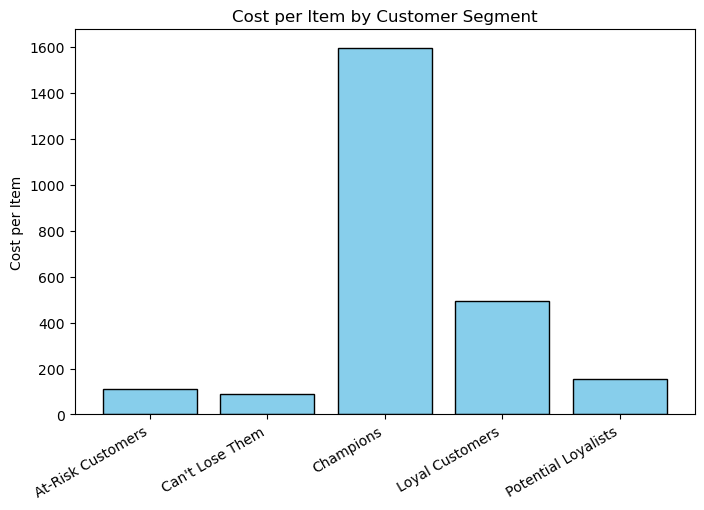

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(cost_check["Segment"], cost_check["Cost_per_item"], color="skyblue", edgecolor="black")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Cost per Item")
plt.title("Cost per Item by Customer Segment")
plt.show()


### Insights on Customer Segments (Cost per Item)

- **Champions**: Highest cost per item (~1600) → buying premium, high-value products.  
- **Loyal Customers**: Also spend more per item (~500), though not as much as Champions.  
- **At-Risk, Can’t Lose Them, and Potential Loyalists**: Purchase lower-cost products (~100–150).  

---

### Implications

- **Champions & Loyal Customers** → Most profitable groups  
  - Focus on **exclusive offers**, **early access**, and **loyalty rewards**.  

- **At-Risk & Potential Loyalists** → More price-sensitive  
  - Attract them with **discounts**, **bundles**, or **entry-level products**.  


## 📅 Predicting Next Purchase Day (Regression Model)

### 🔍 Objective  
Build a regression model to **predict the number of days until a customer’s next purchase**.  
This helps in **personalized marketing campaigns** (e.g., reminders, offers before churn).

---

### 📂 Data Preparation  
- **Target Variable**: `NextPurchaseDay` (days between current and next transaction).  
- **Features**:  
  - RFM features (Recency, Frequency, Monetary Value).  
  - Customer behavior (avg. basket size, purchase intervals, categories).  
  - Seasonal patterns (day of week, month, holidays).  
  - Demographics or location (if available).  

---

### ⚙️ Modeling Approach  
- Models to try:  
  - **Linear Regression** (baseline).  
  - **Random Forest Regressor** / **XGBoost Regressor** (non-linear).  
  - **Gradient Boosting Regressor** (captures complex trends).  
- Cross-validation with **Time Series Split** to respect temporal order.  
- Evaluation Metrics:  
  - **MAE (Mean Absolute Error)** → average error in days.  
  - **RMSE (Root Mean Squared Error)** → penalizes large errors.  
  - **R² Score** → variance explained by model.  

---

### 📊 Business Use Cases  
- **Early re-engagement**: Send reminders/offers if predicted next purchase is long.  
- **Inventory planning**: Forecast demand spikes based on aggregate predictions.  
- **Churn reduction**: Identify customers at risk of long inactivity.  

---

### ✅ Example Insight  
- Model predicts a **Loyal Customer** will repurchase in **12 days**.  
  → Send a loyalty reward on **Day 10** to accelerate purchase.  


In [49]:
df["InvoiceDate"] = pd.to_datetime(df['InvoiceDate'])

In [50]:
# Group by Customer ID and collect all purchase dates
customer_purchase_dates = (
    df.groupby('Customer ID')['InvoiceDate']
      .apply(list)  # collect all invoice dates into a list
      .apply(sorted)  # sort the list for each customer
)



In [51]:
customer_purchase_dates = customer_purchase_dates.reset_index()
customer_purchase_dates.columns = ['Customer ID', 'InvoiceDate']  # rename columns

In [52]:
customer_purchase_dates

Customer ID                                        InvoiceDate
0           12346  [2009-12-14 08:34:00, 2009-12-14 11:00:00, 200...
1           12347  [2010-10-31 14:20:00, 2010-10-31 14:20:00, 201...
2           12348  [2010-09-27 14:59:00, 2010-09-27 14:59:00, 201...
3           12349  [2010-04-29 13:20:00, 2010-04-29 13:20:00, 201...
4           12350  [2011-02-02 16:01:00, 2011-02-02 16:01:00, 201...
...           ...                                                ...
5876        18283  [2010-02-19 17:16:00, 2010-02-19 17:16:00, 201...
5877        18284  [2010-10-04 11:33:00, 2010-10-04 11:33:00, 201...
5878        18285  [2010-02-17 10:24:00, 2010-02-17 10:24:00, 201...
5879        18286  [2009-12-16 10:45:00, 2009-12-16 10:45:00, 200...
5880        18287  [2010-05-17 11:55:00, 2010-05-17 11:55:00, 201...

[5881 rows x 2 columns]

In [53]:
def calculate_inter_purchase_time(dates):
    if len(dates) < 2:
        return []
    return (pd.Series(dates).diff().dropna()).dt.days.tolist()

customer_purchase_dates['InterPurchaseTimes'] = customer_purchase_dates['InvoiceDate'].apply(calculate_inter_purchase_time)


In [54]:
customer_purchase_dates['AvgInterPurchaseTime'] = customer_purchase_dates['InterPurchaseTimes'].apply(lambda x: np.mean(x) if x else np.nan)
customer_purchase_dates['DaysBetweenLastPurchases'] = customer_purchase_dates['InterPurchaseTimes'].apply(lambda x: x[-1] if x else np.nan)


In [55]:
rfm_df = rfm_df.merge(customer_purchase_dates[['Customer ID', 'AvgInterPurchaseTime', 'DaysBetweenLastPurchases']], on='Customer ID', how='left')

In [60]:
regression_df = rfm_df.dropna(subset=['AvgInterPurchaseTime', 'DaysBetweenLastPurchases'])

In [65]:
features_reg = ['Recency', 'Frequency', 'MonetaryValue', 'AvgInterPurchaseTime']
X_reg = regression_df[features_reg]
y_reg = regression_df['DaysBetweenLastPurchases'] # Our target is to predict this


In [66]:
from sklearn.model_selection import train_test_split


In [67]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

# --- 5. Evaluate the Model ---
y_pred_reg = rf_regressor.predict(X_test_reg)

print("\n--- Regression Model Evaluation ---")
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Absolute Error (MAE): {mae:.2f} days")
print(f"R-squared (R2): {r2:.2f}")

# --- 6. Predict Days Until Next Purchase for Best Customers ---
# We'll predict for Champions and Loyal Customers who have made multiple purchases
best_customers_df = rfm_df[
    rfm_df['Segment'].isin(['Champions', 'Loyal Customers']) &
    rfm_df['AvgInterPurchaseTime'].notna()
].copy()

best_customers_df['PredictedDaysUntilNextPurchase'] = rf_regressor.predict(best_customers_df[features_reg])

# Display the predictions
print("\n--- Predicted Next Purchase Day for Top 10 Best Customers ---")
print(best_customers_df[['Recency', 'Frequency', 'AvgInterPurchaseTime', 'PredictedDaysUntilNextPurchase']].head(10).round(1))


--- Regression Model Evaluation ---
Mean Absolute Error (MAE): 3.82 days
R-squared (R2): 0.39

--- Predicted Next Purchase Day for Top 10 Best Customers ---
    Recency  Frequency  AvgInterPurchaseTime  PredictedDaysUntilNextPurchase
0       326         12                  12.0                           149.2
1         2          8                   1.6                             0.0
2        75          5                   7.2                             0.0
3        19          4                   3.3                             0.1
6        36         10                   3.5                             0.0
10       23          6                   2.8                             0.0
11       33          3                   1.2                             0.0
12        2          5                   9.6                             0.2
13       58         10                   1.9                             0.0
14       52          8                   2.8                            

## 📊 Interpreting the Predictions (Customer Table)

This is where the model's logic becomes clear.

---

### **Observation 1: Why are so many predictions close to 0?**

You'll notice that for many of your "best customers", the `PredictedDaysUntilNextPurchase` is very low (e.g., 0.0, 0.1, 0.2). This is **not an error**; it's actually the model working correctly.

- Example: Customer at index 1  
  - **Recency:** 2 days  
  - **AvgInterPurchaseTime:** 1.6 days  

This customer is extremely active—they bought something just 2 days ago and typically buy every 1–2 days. The model predicts their next purchase is imminent—it could happen today.  

**Business Meaning:** A prediction near zero identifies your most engaged, "hot" customers. They are in an active buying state.

---

### **Observation 2: How the model handles different behaviors**

- Example: Customer at index 0  
  - **Recency:** 326 days (hasn’t purchased in almost a year)  
  - **Frequency:** 12  

The model predicts it will be another 149 days until their next purchase.  

**Business Meaning:** The model separates truly active customers from lapsed ones. Customers inactive for a long time, even if frequent in the past, are likely to remain inactive.

---

## **How to Use These Results (Actionable Insights)**

### **Customers with Predictions of 0–5 Days**
- **Who they are:** Most loyal and active customers.  
- **Action:** Target immediately with campaigns like **"New Arrivals," "Top Sellers,"** or **"Complete the Look"**.  
  - Avoid "We miss you" discounts—they are already engaged.

### **Customers with Predictions of 15–45 Days**
- **Who they are:** Regular, reliable customers.  
- **Action:** Schedule automated marketing emails/offers around their predicted purchase date.  
  - Example: Predicted return in 30 days → send email on day 25.

### **Customers with High Predictions (> 90 Days)**
- **Who they are:** Lapsed or infrequent customers.  
- **Action:** Use **win-back campaigns** with special offers or surveys to re-engage.  
  - Standard "new product" emails may not work.
